# Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. 

* This task is asking for 2 hypothesis tests:
1. A Normality test for normal distribution
2. A Ttest to compare the sample mean with a mean of 0.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [147]:
## 1. read the big flights_csv file in chunks of 1 million rows at a time
chunk = pd.read_csv('flights.csv', chunksize=1000000, low_memory=False)
df = pd.concat(chunk)


## OR 2. read the flights_sample csv
# df = pd.read_csv('flights_sample.csv')

In [162]:
# take only the relevant columns and remove Null values

tmp = df[['arr_delay', 'crs_arr_time', 'arr_time']]
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927485 entries, 0 to 15927484
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   arr_delay     float64
 1   crs_arr_time  int64  
 2   arr_time      float64
dtypes: float64(2), int64(1)
memory usage: 364.6 MB


In [163]:
tmp.info()

# check for records where dep_delay is NAN because there was no delay

filter1 = tmp['arr_delay'].isna()
filter2 = tmp['crs_arr_time'] == tmp['arr_time']
tmp[(filter1) & (filter2)].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927485 entries, 0 to 15927484
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   arr_delay     float64
 1   crs_arr_time  int64  
 2   arr_time      float64
dtypes: float64(2), int64(1)
memory usage: 364.6 MB


,arr_delay,crs_arr_time,arr_time
4100,NaN,1835,1835.0
4135,NaN,1418,1418.0
4157,NaN,1035,1035.0
4235,NaN,1129,1129.0
4250,NaN,725,725.0


In [164]:
len(tmp[(filter1) & (filter2)]) # count the records to confirm if they're deleted later

2600

In [165]:
# loop through all those records and set arr_delay to 0
indices = tmp[(filter1) & (filter2)].index.to_list()

for idx in indices:
    tmp.loc[idx, 'arr_delay'] = 0

In [166]:
# filter and repeat the count
filter1 = tmp['arr_delay'].isna()
filter2 = tmp['crs_arr_time'] == tmp['arr_time']
len(tmp[(filter1) & (filter2)])

0

In [ ]:
# remove the extra columns and Null values of arr_delay
delay = tmp['arr_delay'].copy()
delay.dropna(inplace=True)
del tmp

In [189]:
## Running the Normality test with shapiro

from scipy.stats import shapiro

delay_sample = delay.sample(n=2000)
stat, p = shapiro(delay_sample.values)

print(f'p is {p}')
print('The distribution is', 
      'not Gaussian.' if p < 0.05 else 'probably Gaussian.')

p is 0.0
The distribution is not Gaussian.


In [173]:
## Running the Ttest and comparing to a mean of 0

delay_sample = delay.sample(n=2000)

from scipy.stats import ttest_1samp
stats, p = ttest_1samp(delay_sample.values, popmean=0)

print(f'p is {p}')
print('The mean of the distribution is', 
      (' not' if p < 0.05 else ' probably'),
     'equal to 0.')

p is 1.8910294069573526e-05
The mean of the distribution is  not equal to 0.


## Checking the population...

In [175]:
delay.describe()

count    1.561834e+07
mean     5.475021e+00
std      4.986990e+01
min     -1.290000e+03
25%     -1.500000e+01
50%     -6.000000e+00
75%      8.000000e+00
max      2.973000e+03
Name: arr_delay, dtype: float64

**Observation**: the mean of the dataset is not 0.

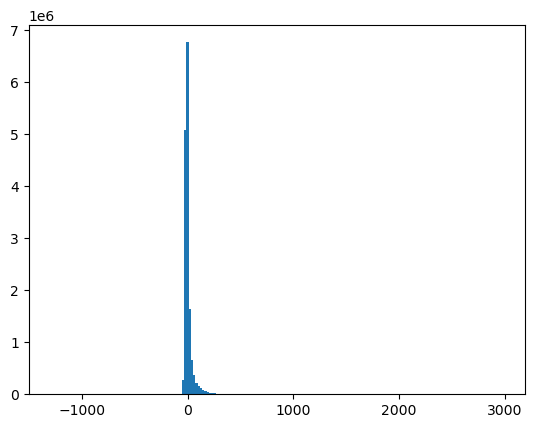

In [178]:
plt.hist(delay, bins=200);

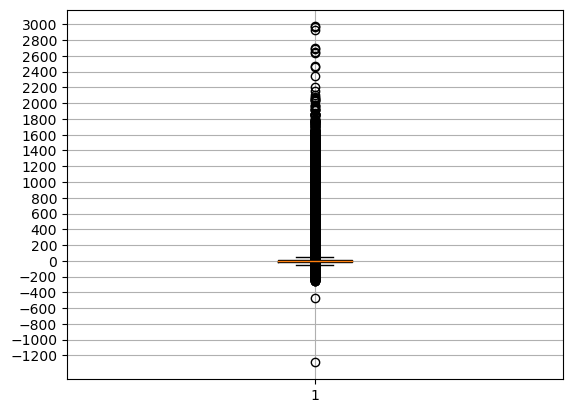

In [185]:
plt.boxplot(delay)
plt.yticks(np.arange(-1200,3200,step=200))
plt.grid(which='both')

## Removing Outliers

It's obvious from the visualizations that this distribution is neither normal or has a mean of 0... But we will remove the outliers and run the tests again.

In [186]:
delay_minus_outliers = delay.copy()
for idx in delay_minus_outliers.index:
    if delay_minus_outliers[idx] > 2200:
        delay_minus_outliers[idx] = 2200
    elif delay_minus_outliers[idx] < -400:
        delay_minus_outliers[idx] = -400
    

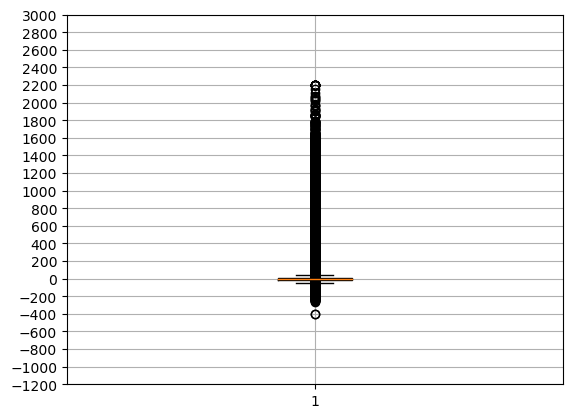

In [187]:
plt.boxplot(delay_minus_outliers)
plt.yticks(np.arange(-1200,3200,step=200))
plt.grid(which='both')

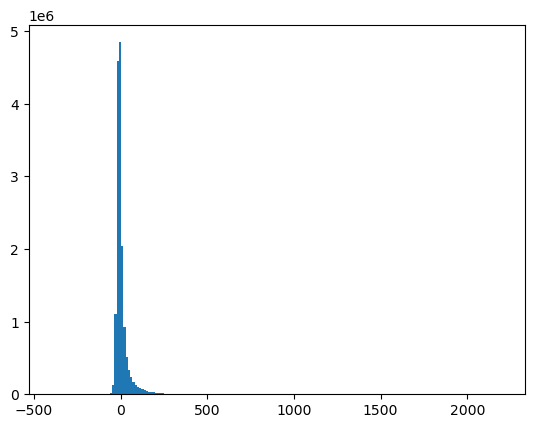

In [188]:
plt.hist(delay_minus_outliers, bins=200);

In [190]:
## Running the Normality test with shapiro

from scipy.stats import shapiro

delay_sample = delay_minus_outliers.sample(n=2000)
stat, p = shapiro(delay_sample.values)

print(f'p is {p}')
print('The distribution is', 
      'not Gaussian.' if p < 0.05 else 'probably Gaussian.')

p is 0.0
The distribution is not Gaussian.


In [191]:
## Running the Ttest and comparing to a mean of 0

delay_sample = delay_minus_outliers.sample(n=2000)

from scipy.stats import ttest_1samp
stats, p = ttest_1samp(delay_sample.values, popmean=0)

print(f'p is {p}')
print('The mean of the distribution is', 
      (' not' if p < 0.05 else ' probably'),
     'equal to 0.')

p is 1.0094760695264722e-07
The mean of the distribution is  not equal to 0.


## Summary 
    
1. Test for Hypothesis that the distribution is a normal distribution. 
- **Result**: The distribution is probably not a normal distribution.
   
 

2. Testing the Hypothesis that the distribution has a mean of zero.
- **Result**: The distribution probably does not have a mean of zero.